In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# This notebook should be run under "scripts/"

import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)

if PATH not in sys.path:
    sys.path.append(PATH)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

from BusinessAnalyticsProject.dataset.feature_engineering import train_test_split
from BusinessAnalyticsProject.models.model_selection import (
    create_pipeline,
    hyperparam_tuning,
    metrics,
    benchmark
)
from BusinessAnalyticsProject.models.model_interpretation import (
    create_benchmark_plot,
    create_feature_importance_plot,
    show_weights_permutation_importance,
    show_weights_permutation_importance_non_sklearn
)

In [4]:
sns.set_theme()
# warnings.filterwarnings("ignore")

## Read in Features

In [5]:
all_train_df = pd.read_csv("../data/processed/all_train.csv", index_col=[0], parse_dates=["Date"])
all_test_df = pd.read_csv("../data/processed/all_test.csv", index_col=[0], parse_dates=["Date"])

X_train, y_train, weights_train, X_test, y_test, weights_test = train_test_split(all_train_df)
X_train.shape, y_train.shape, weights_train.shape, X_test.shape, y_test.shape, weights_test.shape

((294132, 15), (294132,), (294132,), (127438, 15), (127438,), (127438,))

## Benchmark: WLS

In [6]:
pipeline_data = create_pipeline(
    None,
    None,
    if_to_one_hot=True
)
pipeline_data

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one_hot', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021A630F0160>),
                                ('continuous',
                                 Pipeline(steps=[('dummy',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function identity at 0x0000021A242A0B80>))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000021A630F0100>)])

In [7]:
results, metrics_val = benchmark(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.545
Model:                            WLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3589.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:20:35   Log-Likelihood:            -3.4164e+06
No. Observations:              294132   AIC:                         6.833e+06
Df Residuals:                  294033   BIC:                         6.834e+06
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        5281.7801    303.020     17.430      0.000    4687.870    5875.690
categorical__Dept_1          6266.5554    309.478     20.249      0.000    5659.986    6873.124
categorical__Dept_2          2.876e+04    309.478     92.923      0.000    2.82e+04    2.94e+04
categorical__Dept_3         -2023.4736    309.478     -6.538      0.000   -2630.043   -1416.905
categorical__Dept_4          1.292e+04    309.478     41.752      0.000    1.23e+04    1.35e+04
categorical__Dept_5          1.794e+04    311.668     57.562      0.000    1.73e+04    1.86e+04
categorical__Dept_6         -6329.6890    316.459    -20.002      0.000   -6949.940   -5709.438
categorical__Dept_7          1.768e+04    309.478     57.115      0.000    1.71e+04    1.83e+04
categorical__Dept_8          1.613e+04    309.478     52.109      0.000    1.55e+04    1.67e+04
categorical__Dept_9          5615.0217    312.170     17.987      0.000    5003.178    6226.866
categorical__Dept_10         4798.9369    309.478     15.507      0.000    4192.368    5405.506
categorical__Dept_11          989.2073    309.487      3.196      0.001     382.622    1595.793
categorical__Dept_12        -9660.5977    310.108    -31.152      0.000   -1.03e+04   -9052.795
categorical__Dept_13         1.664e+04    309.478     53.763      0.000     1.6e+04    1.72e+04
categorical__Dept_14         5791.0070    309.478     18.712      0.000    5184.438    6397.576
categorical__Dept_16        -4723.8051    309.478    -15.264      0.000   -5330.374   -4117.236
categorical__Dept_17        -2084.6492    309.495     -6.736      0.000   -2691.251   -1478.048
categorical__Dept_18        -1248.0820    321.114     -3.887      0.000   -1877.457    -618.707
categorical__Dept_19        -1.425e+04    366.219    -38.917      0.000    -1.5e+04   -1.35e+04
categorical__Dept_20        -8502.8768    319.726    -26.594      0.000   -9129.530   -7876.223
categorical__Dept_21        -8134.7607    309.478    -26.285      0.000   -8741.330   -7528.192
categorical__Dept_22        -2135.9925    327.908     -6.514      0.000   -2778.682   -1493.303
categorical__Dept_23         1.039e+04    324.661     32.003      0.000    9753.685     1.1e+04
categorical__Dept_24        -8345.9391    330.734    -25.235      0.000   -8994.169   -7697.710
categorical__Dept_25        -4446.5103    310.579    -14.317      0.000   -5055.236   -3837.785
categorical__Dept_26        -6330.0423    322.943    -19.601      0.000   -6963.002   -5697.083
categorical__Dept_27        -1.336e+04    328.017    -40.737      0.000    -1.4e+04   -1.27e+04
categorical__Dept_28        -1.323e+04    314.917    -42.022      0.000   -1.39e+04   -1.26e+04
categorical__Dept_29        -9412.4149    332.741    -28.288      0.000   -1.01e+04   -8760.252
categorical

In [8]:
metrics_val

{'r2_score': 0.5584703470516706,
 'rmse': 14698.534011053565,
 'rwmse': 5738919.085240822}

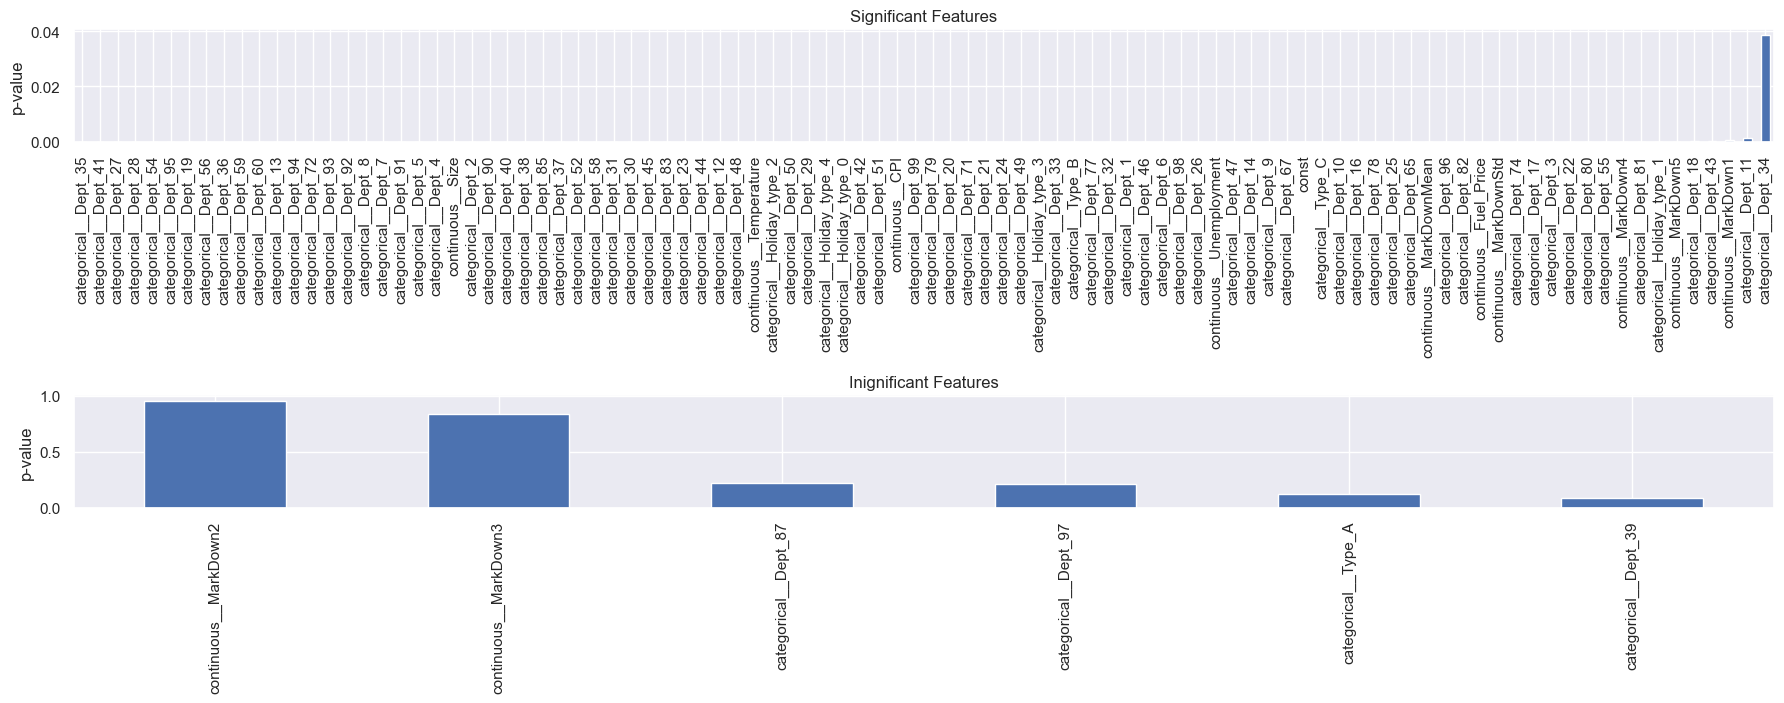

In [9]:
fig, axes = create_benchmark_plot(results)

## Hyperparamter Tuning for ML Models

1. Register a new model by creating a configuration file under ```configs/```. For example, ```RegressionForestRegressor``` is registered by creating ```configs/RF.py```
    1. You need to create ```CONFIG``` dict with the same keys
    1. Then fill in the model class, default parameters and parameter search space
    1. Import the ```CONFIG``` dict by ```from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG```

1. Create a pipeline using ```create_pipeline(.)```. You can specify whether to 
    - use winsorization (cutting extreme quantiles like < 2% and > 98%), 
    - use data normalization (StandardScalar()) and/or 
    - do one-hot encoding for categorical columns.
1. Run hyperparameter tuning using ```hyperparam_tuning(.)```
    1. You need to specify a ```save_dir``` directory. The refitted best model, all metrics ($R^2$, RMSE and WRMSE(Weighted RMSE)) and cross-validation results are saved in the ```save_dir```.

### RF

In [10]:
# Step 1
from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG

RF_CONFIG  ## Load your model configuaration dict

{'model_cls': sklearn.ensemble._forest.RandomForestRegressor,
 'params': {'n_estimators': 100, 'max_depth': 5, 'verbose': 1, 'n_jobs': 5},
 'param_space': {'n_estimators': [2, 5, 10, 50, 75],
  'max_depth': [None, 3, 5, 7],
  'min_samples_split': [2, 5, 10, 20],
  'min_samples_leaf': [1, 2, 5, 10, 20],
  'max_features': [None, 'sqrt', 'log2', 1.0]}}

In [11]:
# Step 2
pipeline = create_pipeline(
    RF_CONFIG["model_cls"],
    RF_CONFIG["params"],
    if_winsorization=False,
    if_data_normalization=False,
    if_to_one_hot=True
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD1ED5CE20>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001AD7FDFD040>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD1ED5CB20>)])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_jobs=5, verbose=1))])

In [12]:
# Step 3
opt, metrics_val = hyperparam_tuning(
    pipeline,
    RF_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/RF/"  ## Change to your save_dir
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  4.9min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:    0.3s finished


In [11]:
metrics_val

{'r2_score': 0.9072043430006301,
 'rmse': 6738.4174004025535,
 'rwmse': 2659558.178535781}

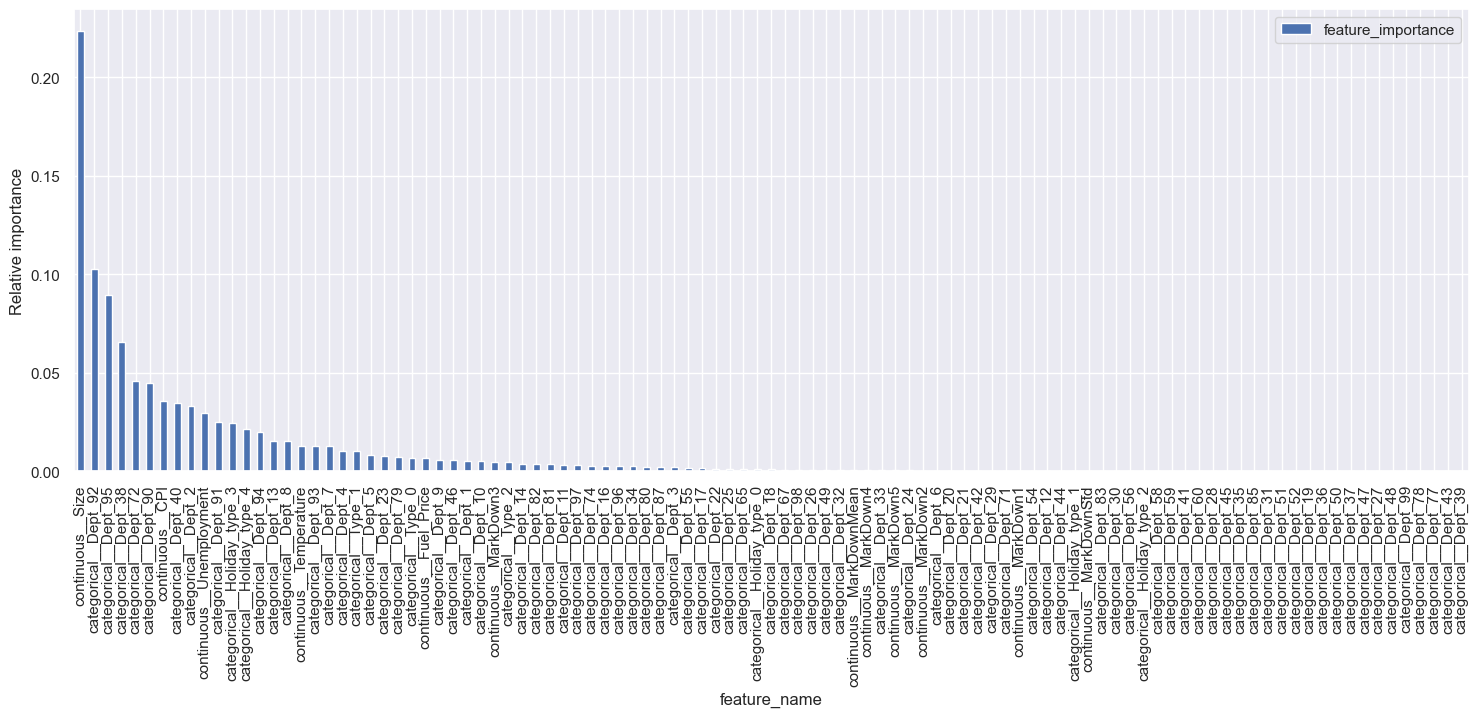

In [14]:
fig, axes = create_feature_importance_plot(opt.best_estimator_)

In [10]:
with open("../outputs/models/RF/updated_pipeline_and_metrics.pkl", "rb") as rf:
    models_all = pickle.load(rf)

opt_reloaded = models_all["model"]
opt_reloaded

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027D2A626DC0>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x0000027D17053CA0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027D2A62D100>)])),
                ('model',
                 RandomForestRegressor(max_features=None, min_samples_leaf=10,
                                       min_samples_split=10, n_estimators=75,
                                       n_jobs=5, verbose=1))])

In [ ]:
fig, axis = show_weights_permutation_importance(
    opt_reloaded, 
    X_train, 
    y_train,
    save_dir="../outputs/models/RF/"
)

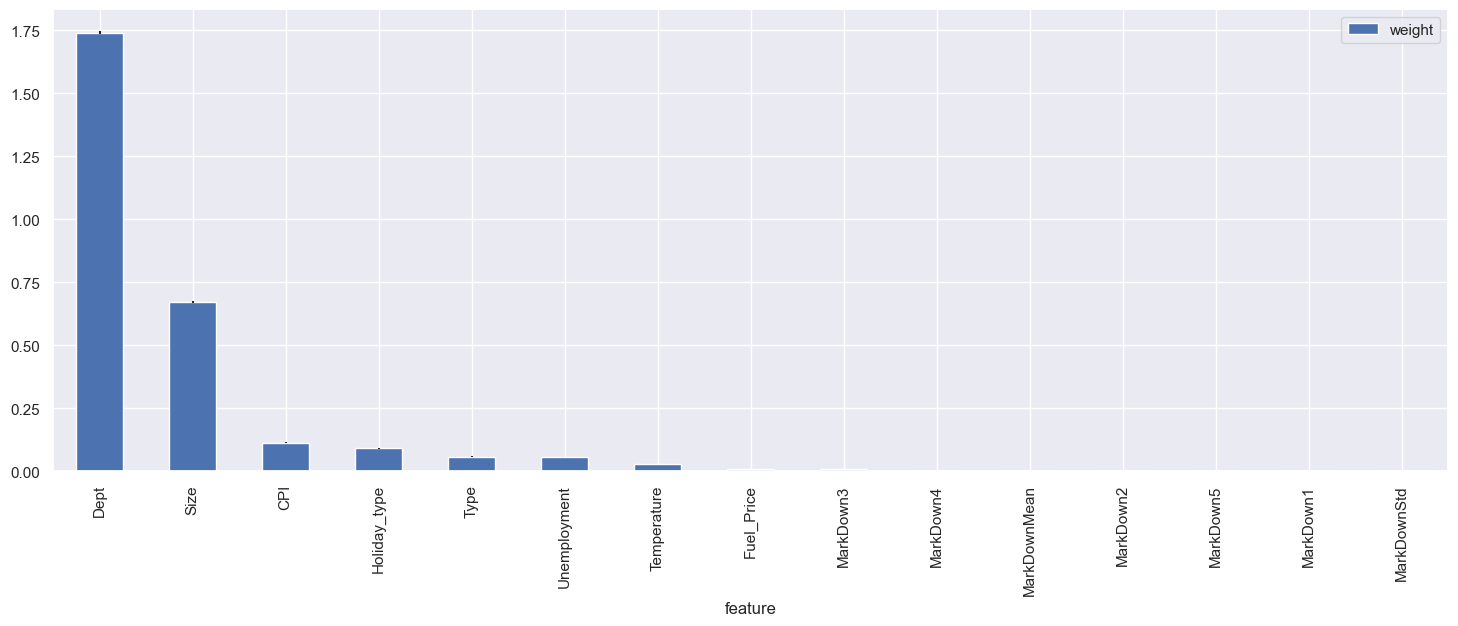

In [13]:
fig

## HGBR

In [21]:
from BusinessAnalyticsProject.configs.HGBR import CONFIG as HGBR_CONFIG

# HGBR_CONFIG["params"]["categorical_features"] = (X_train.dtypes == "category").values
HGBR_CONFIG

{'model_cls': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor,
 'params': {'categorical_features': None},
 'param_space': {'max_iter': [100, 200, 300, 500],
  'learning_rate': [0.01, 0.05, 0.1, 0.2],
  'max_depth': [None, 3, 5, 10, 15],
  'min_samples_leaf': [5, 10, 20, 30],
  'l2_regularization': [0, 0.01, 0.1, 1]}}

In [22]:
pipeline = create_pipeline(
    HGBR_CONFIG["model_cls"],
    HGBR_CONFIG["params"],
    if_winsorization=False,
    if_data_normalization=False,
    if_to_one_hot=True,
    if_to_dense=True
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001863ED99FD0>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001863EC84F70>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001863ED99760>)])),
                ('to_dense',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<function to_dense at 0x000001863EC9B040>)),
                ('model', HistGradientBoostingRegressor())])

In [23]:
opt, metrics_val = hyperparam_tuning(
    pipeline,
    HGBR_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/HGBR/"
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [24]:
metrics_val

{'r2_score': 0.8895551361581212,
 'rmse': 7351.345693867406,
 'rwmse': 2897050.2833125396}

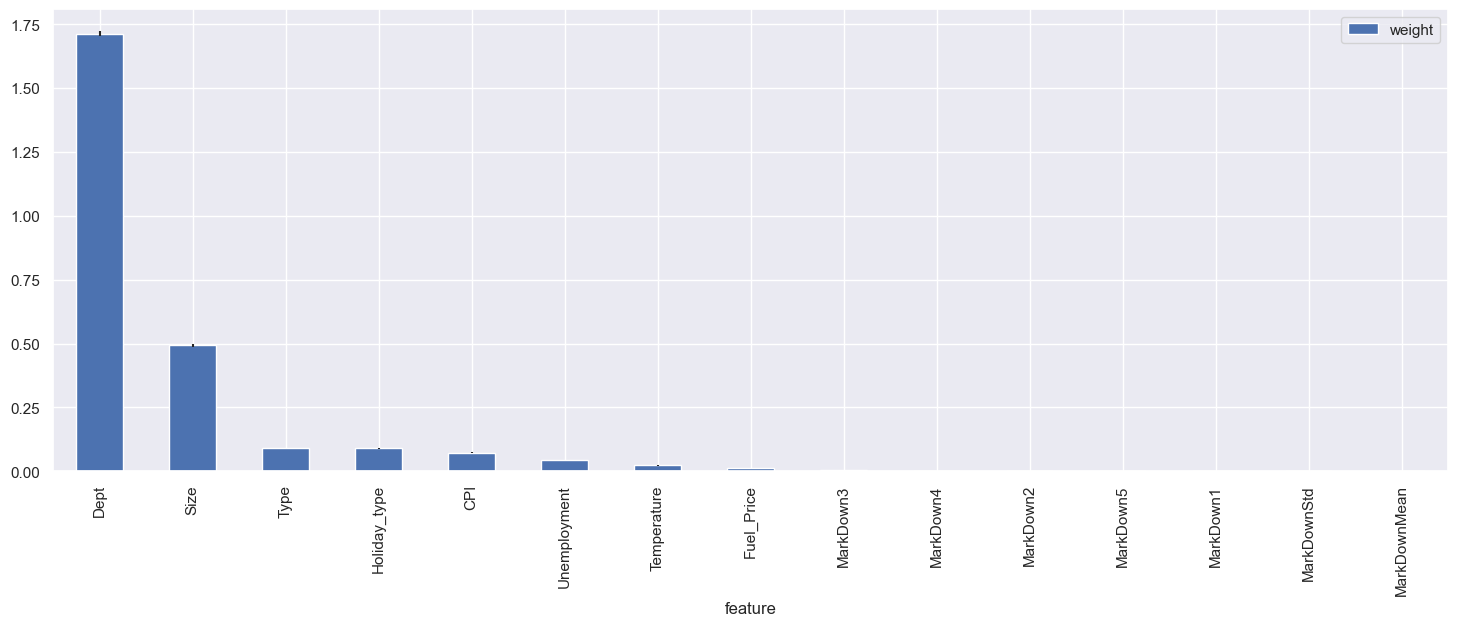

In [62]:
fig, axis = show_weights_permutation_importance(
    opt.best_estimator_, 
    X_train, 
    y_train,
    save_dir="../outputs/models/HGBR/"
)

## LightGBM

In [16]:
from BusinessAnalyticsProject.configs.LGBM import CONFIG as LGBM_CONFIG


LGBM_CONFIG["params"]["categorical_features"] = X_train.select_dtypes(include="category").columns.tolist()
LGBM_CONFIG

{'model_cls': lightgbm.sklearn.LGBMRegressor,
 'params': {'categorical_feature': '',
  'categorical_features': ['Dept', 'Type', 'Holiday_type']},
 'param_space': {'num_leaves': [31, 63, 127, 255],
  'learning_rate': [0.01, 0.05, 0.1, 0.2],
  'min_child_samples': [20, 50, 100],
  'max_depth': [-1, 10, 20, 40],
  'subsample': [0.8, 0.9, 1.0],
  'colsample_bytree': [0.8, 0.9, 1.0],
  'reg_alpha': [0, 0.01, 0.1, 1.0],
  'reg_lambda': [0, 0.01, 0.1, 1]}}

In [17]:
pipeline = create_pipeline(
    LGBM_CONFIG["model_cls"],
    LGBM_CONFIG["params"],
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001DB38991CA0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DB481F58E0>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001DB38991CA0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DB481F51C0>)])),
                ('model',
                 LGBMRegressor(categorical_feature='',
                               categorical_features=['Dept', 'Type',
                                                     'Holiday_type']))])

In [18]:
opt, metrics_val = hyperparam_tuning(
    pipeline,
    LGBM_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/LGBM/"
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

D:\python\venvs\BusinessAnalytics\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\python\venvs\BusinessAnalytics\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.

[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2804
[LightGBM] [Info] Number of data points in the train set: 294132, number of used features: 15
[LightGBM] [Info] Start training from score 16105.306894
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=


In [19]:
metrics_val

{'r2_score': 0.9158872056684022,
 'rmse': 6415.420302418853,
 'rwmse': 2517009.873365448}

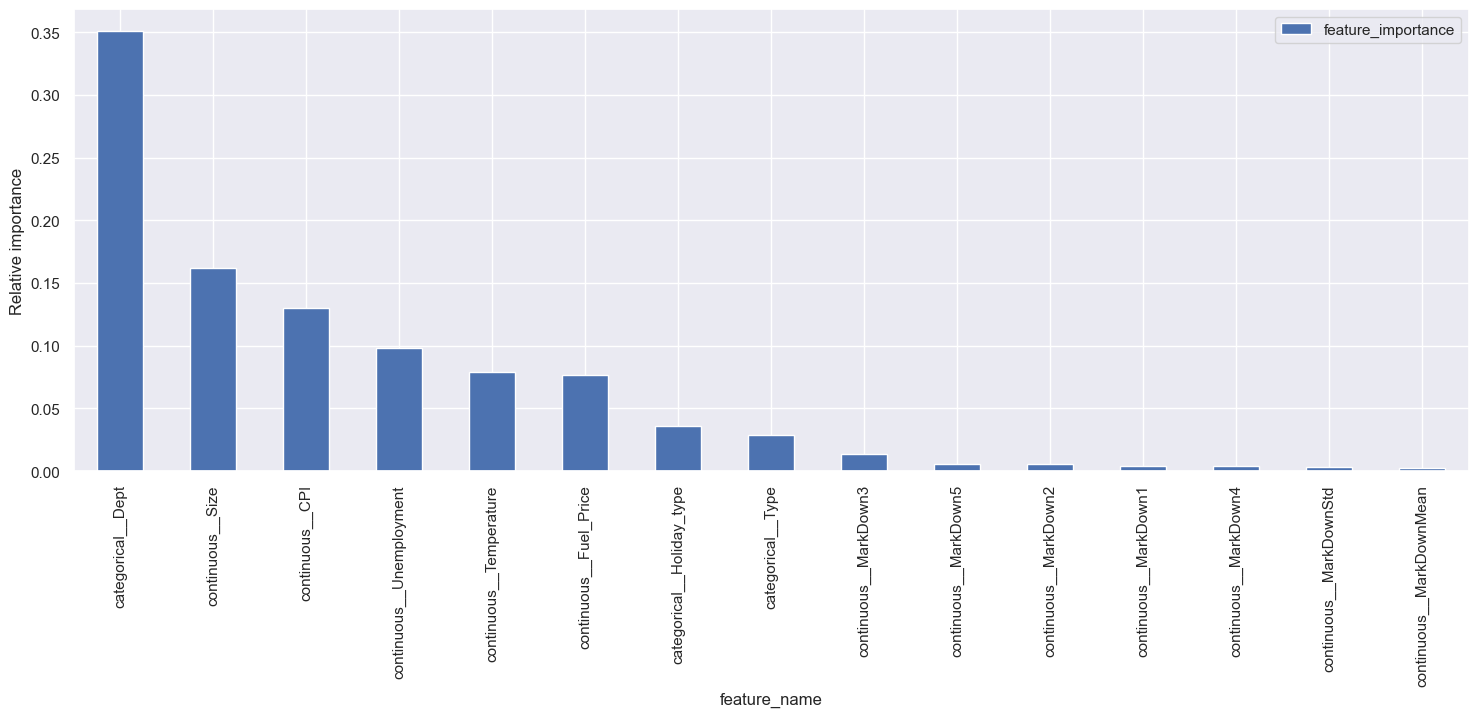

In [20]:
fig, axes = create_feature_importance_plot(opt.best_estimator_)

[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current

[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current value: categorical_feature=
[LightGBM] [Warning] categorical_feature is set=, categorical_features=Dept,Type,Holiday_type will be ignored. Current

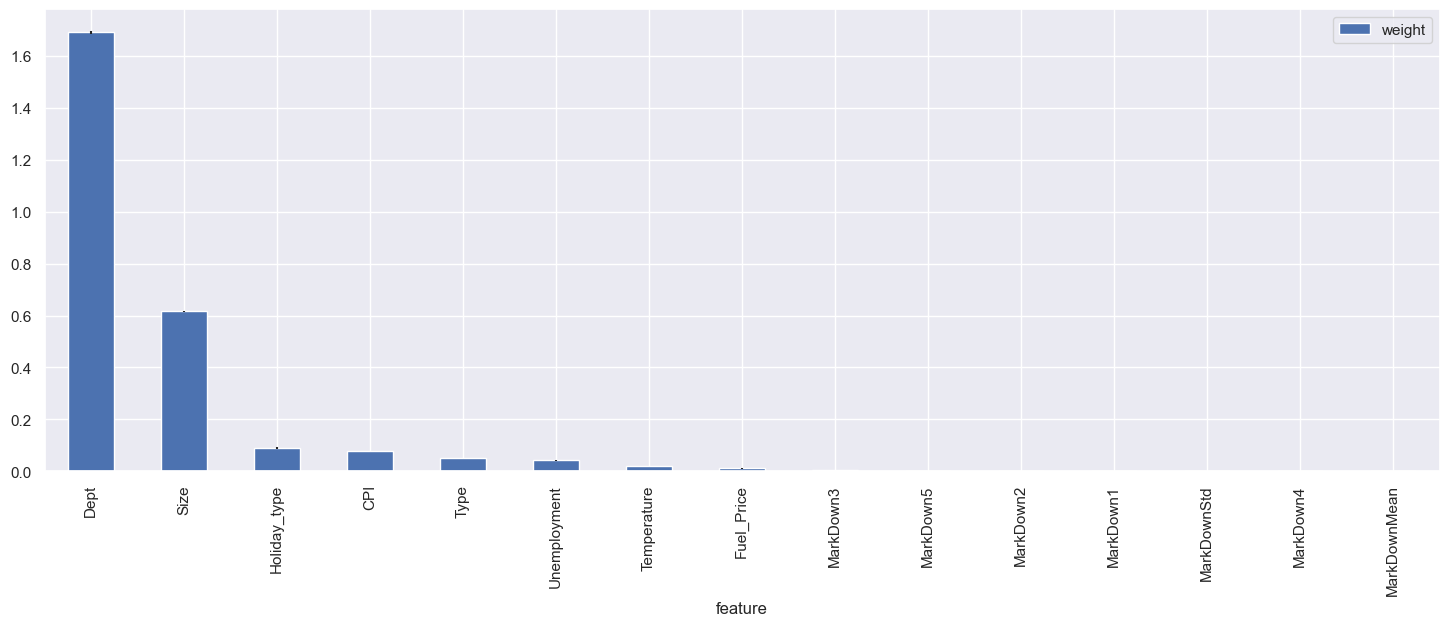

In [21]:
fig, axis = show_weights_permutation_importance(
    opt.best_estimator_, 
    X_train, 
    y_train,
    save_dir="../outputs/models/LGBM/"
)

## XGB

In [10]:
from BusinessAnalyticsProject.configs.XGB import CONFIG as XGB_CONFIG

XGB_CONFIG

{'model_cls': xgboost.sklearn.XGBRegressor,
 'params': {'objective': 'reg:squarederror'},
 'param_space': {'n_estimators': [50, 100, 250, 500],
  'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
  'max_depth': [3, 6, 9, 12, None],
  'min_child_weight': [1, 3, 5, 7],
  'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
  'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
  'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
  'reg_alpha': [0, 0.01, 0.05, 0.1, 0.5, 1, 5],
  'reg_lambda': [0, 0.01, 0.05, 0.1, 0.5, 1, 5]}}

In [11]:
pipeline = create_pipeline(
    XGB_CONFIG["model_cls"],
    XGB_CONFIG["params"],
    if_to_one_hot=True
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEE8FB4A90>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001FED29DFCA0>...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [12]:
opt, metrics_val = hyperparam_tuning(
    pipeline,
    XGB_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/XGB/"
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [13]:
metrics_val

{'r2_score': 0.9088585557258373,
 'rmse': 6678.086450249845,
 'rwmse': 2616876.122159188}

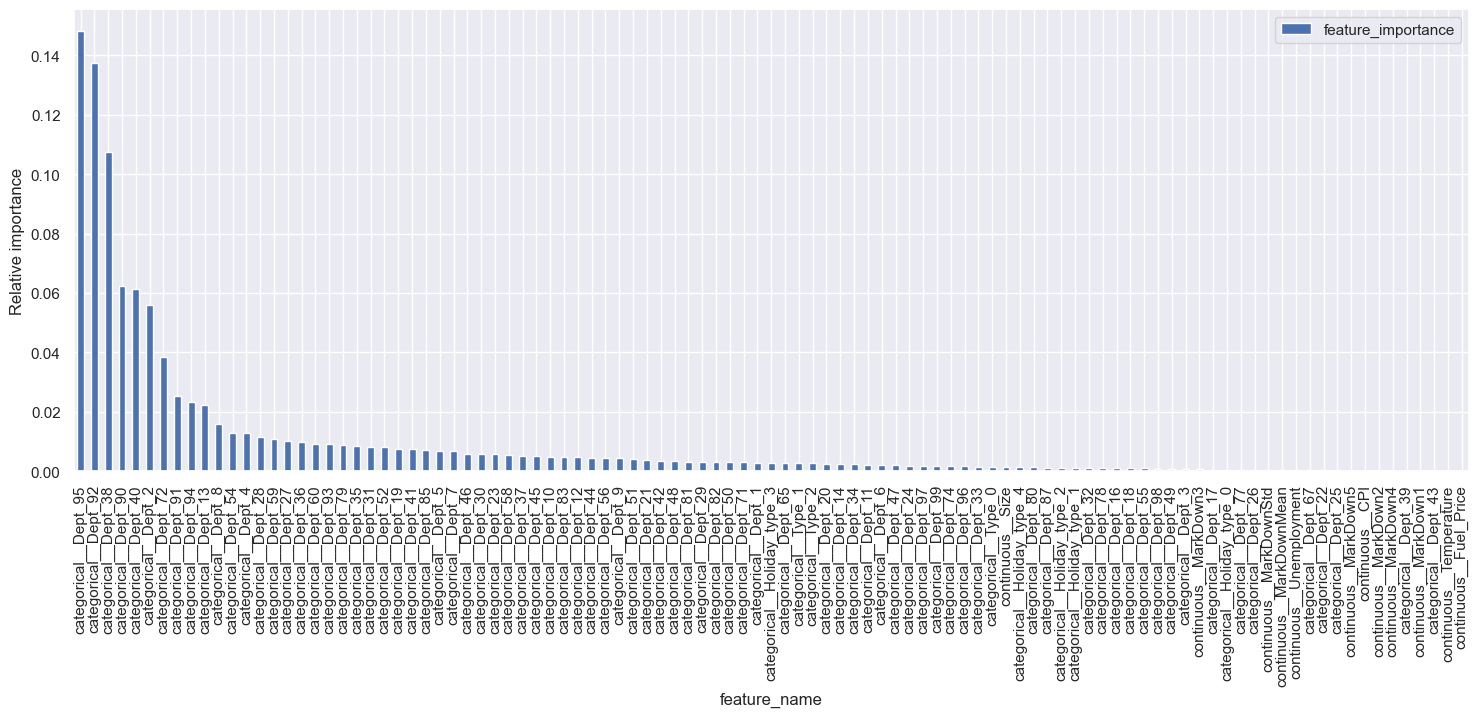

In [14]:
fig, axes = create_feature_importance_plot(opt.best_estimator_)

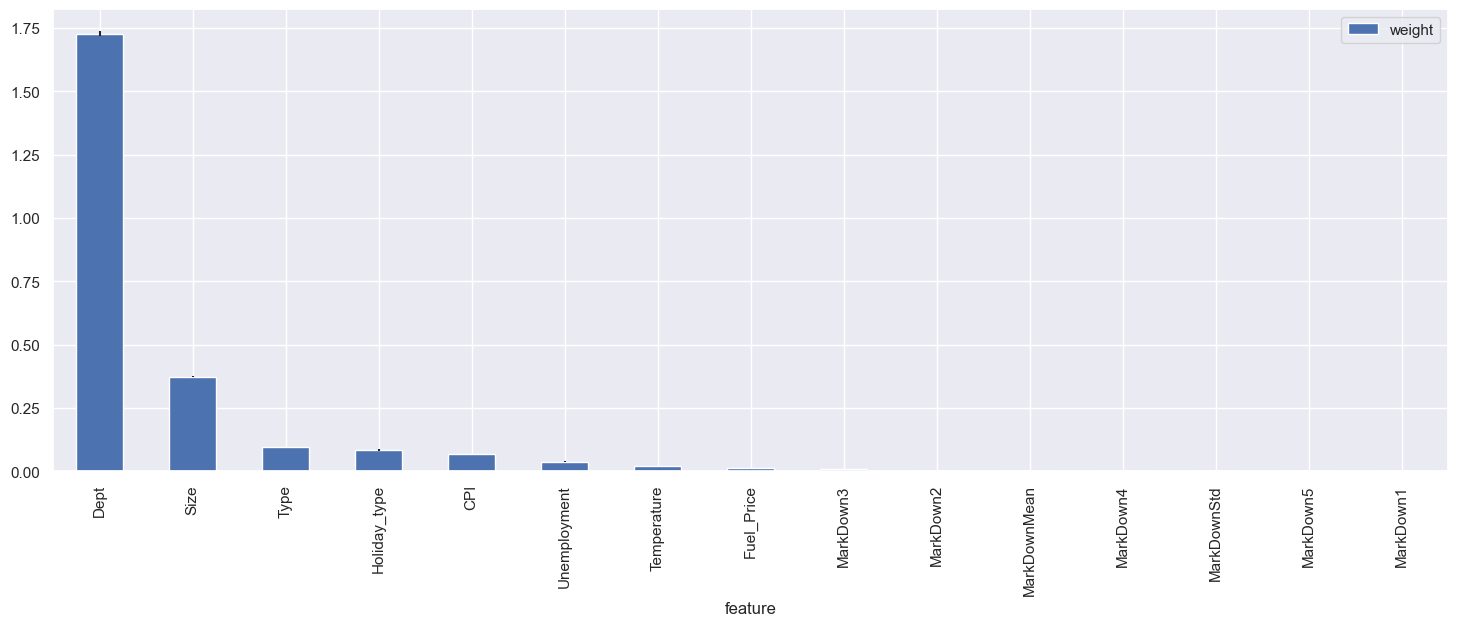

In [15]:
fig, axis = show_weights_permutation_importance(
    opt.best_estimator_, 
    X_train, 
    y_train,
    save_dir="../outputs/models/XGB/"
)

## CatBoost

In [16]:
from BusinessAnalyticsProject.configs.CatBoost import CONFIG as CB_CONFIG

# CB_CONFIG["params"]["cat_features"] = X_train.select_dtypes(include="category").columns.to_list()
CB_CONFIG["params"]["cat_features"] = np.where(X_train.dtypes == "category")[0].tolist()
CB_CONFIG["params"]["train_dir"] = "../outputs/models/CB"
CB_CONFIG

{'model_cls': catboost.core.CatBoostRegressor,
 'params': {'cat_features': [0, 10, 14], 'train_dir': '../outputs/models/CB'},
 'param_space': {'iterations': [50, 100, 200, 500, 1000],
  'depth': [None, 4, 6, 8, 10],
  'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
  'colsample_bylevel': [0.6, 0.7, 0.8, 0.9, 1.0],
  'min_child_samples': [10, 20, 50],
  'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
  'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1, 5],
  'border_count': [15, 31, 63, 127, 255],
  'random_strength': [1, 10, 20]}}

In [17]:
pipeline = create_pipeline(
    CB_CONFIG["model_cls"],
    CB_CONFIG["params"],
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001FED29DFCA0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FE86030670>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001FED29DFCA0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FE860384C0>)])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000001FE86034D90>)])

In [8]:
# cat_cols = CB_CONFIG["params"]["cat_features"]
cat_cols = X_train.select_dtypes(include="category").columns.to_list()
X_train_in = X_train.copy()
X_train_in[cat_cols] = X_train_in[cat_cols].astype(str)
X_test_in = X_test.copy()
X_test_in[cat_cols] = X_test_in[cat_cols].astype(str)
X_train_in.dtypes

Dept             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
MarkDownMean    float64
MarkDownStd     float64
Holiday_type     object
dtype: object

In [ ]:
opt, metrics_val = hyperparam_tuning(
    pipeline,
    CB_CONFIG["param_space"],
    X_train_in,
    y_train,
    weights_train,
    X_test_in,
    y_test,
    weights_test,
    save_dir="../outputs/models/CB/"
)

In [20]:
metrics_val

{'r2_score': 0.903905246164857,
 'rmse': 6857.154313915775,
 'rwmse': 2708537.2646857025}

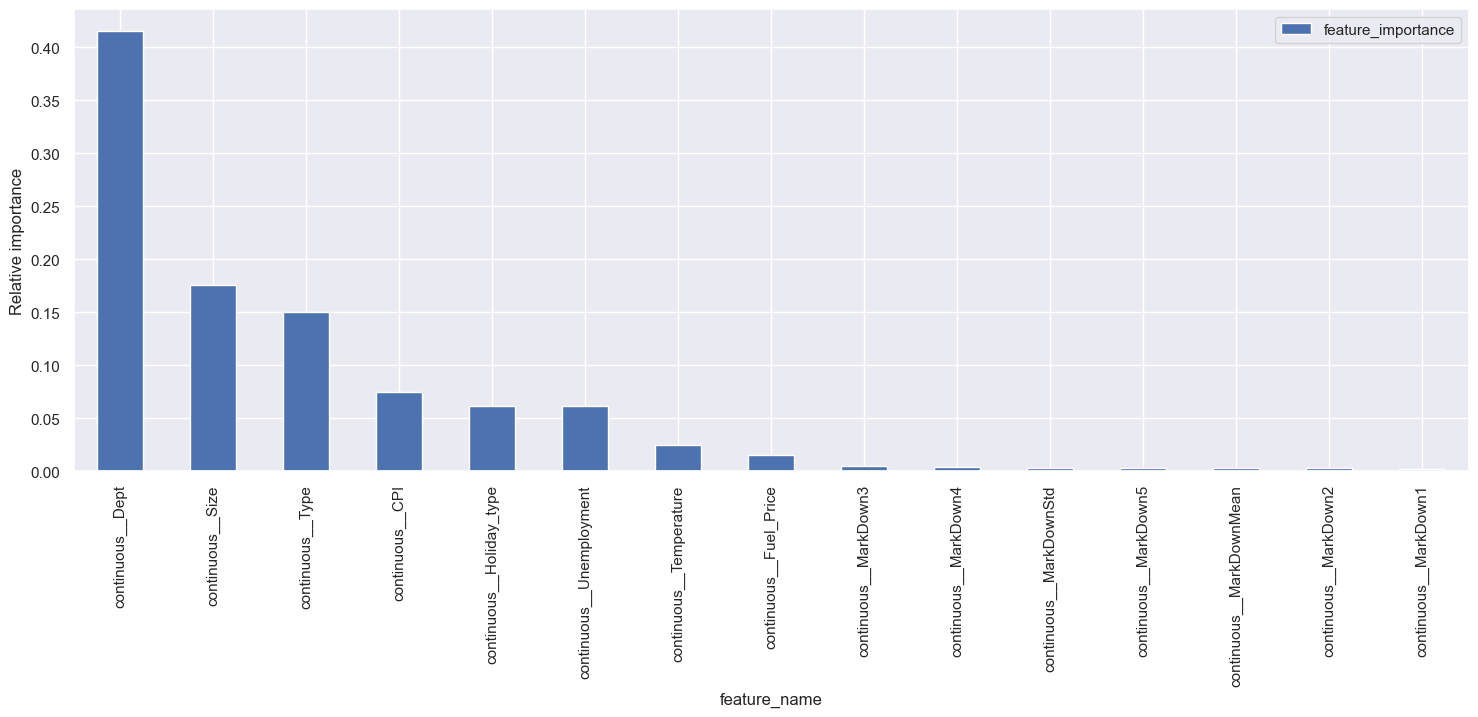

In [21]:
fig, axes = create_feature_importance_plot(opt.best_estimator_)

In [31]:
opt.best_estimator_

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001FED29DFCA0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEEA0ACC70>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001FED29DFCA0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FEE9E7CBB0>)])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000001FEEA0ACBB0>)])

In [6]:
with open("../outputs/models/CB/cv_model_and_metrics.pkl", "rb") as rf:
    models_all = pickle.load(rf)

opt_reloaded = models_all["model"]
opt_reloaded

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('data_preprocessing',
                                         ColumnTransformer(transformers=[('categorical',
                                                                          Pipeline(steps=[('dummy',
                                                                                           FunctionTransformer(feature_names_out='one-to-one',
                                                                                                               func=<function identity at 0x0000027D17053CA0>))]),
                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x0000027D19C07C10>),
                                                                         ('continuous',
                                                                          Pipeline(ste...
              search_spaces={'model__border_count': [15, 31, 63, 127, 255],
                             'model__colsample_bylevel': [0.6, 0.7, 0.8, 0.9,
                                                          1.0],
                             'model__depth': [None, 4, 6, 8, 10],
                             'model__iterations': [50, 100, 200, 500, 1000],
                             'model__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                             'model__min_child_samples': [10, 20, 50],
                             'model__random_strength': [1, 10, 20],
                             'model__reg_lambda': [0.01, 0.05, 0.1, 0.5, 1, 5],
                             'model__subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
              verbose=3)

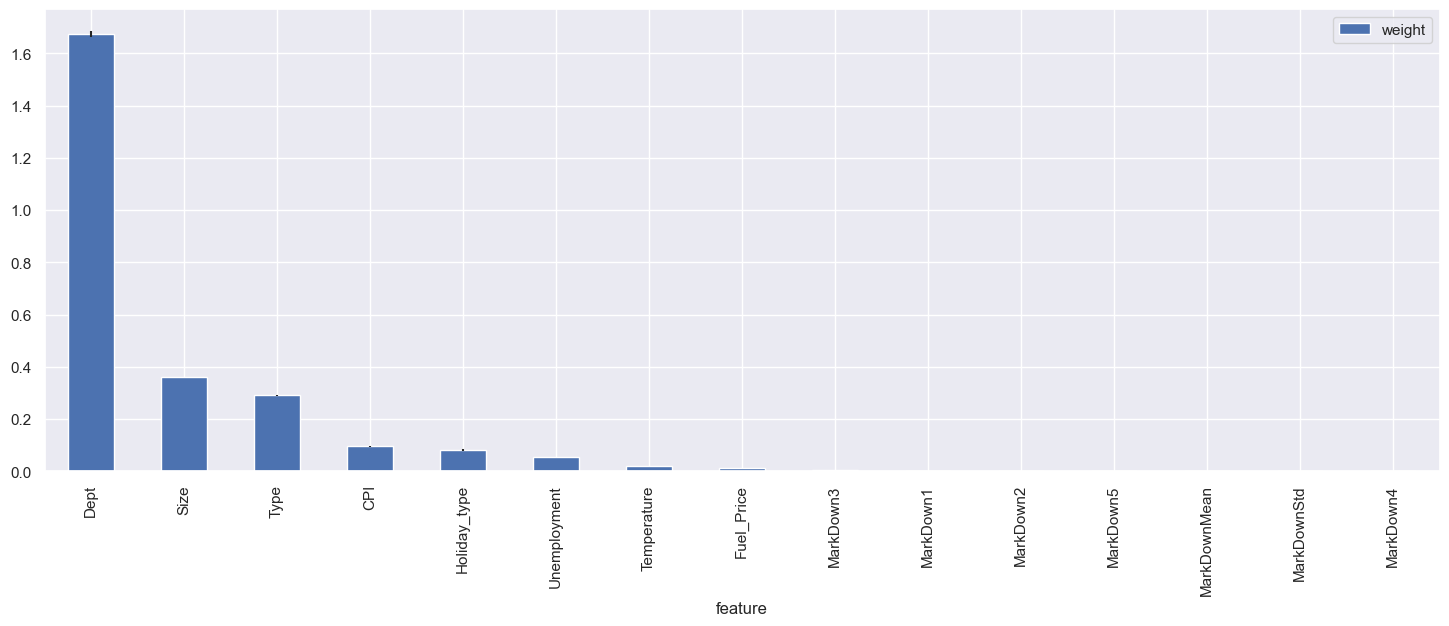

In [9]:
fig, axis = show_weights_permutation_importance_non_sklearn(
    opt_reloaded.best_estimator_, 
    X_train_in, 
    y_train,
    save_dir="../outputs/models/CB/"
)